In [1]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import fastjet
import numpy as np
import awkward as ak
from coffea import processor
import hist
import coffea.nanoevents.methods.vector as vector
import warnings
import matplotlib.pyplot as plt
import math

/tmp/ipykernel_388648/1518451047.py:8: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  import coffea.nanoevents.methods.vector as vector


In [2]:
warnings.filterwarnings("ignore", module="coffea.*")
warnings.filterwarnings("ignore", "Found duplicate branch")
warnings.filterwarnings("ignore", "Missing cross-reference index for")
warnings.filterwarnings("ignore", "dcut")
warnings.filterwarnings("ignore", "Please ensure")
warnings.filterwarnings("ignore", "invalid value")

In [3]:
with open('../../filelists/hgg_files.txt', 'r') as f:
    hgg_files = [line.strip() for line in f]
with open('../../filelists/hbb_files.txt', 'r') as f:
    hbb_files = [line.strip() for line in f]
with open('../../filelists/300to470_files.txt', 'r') as f:
    qcd_files = [line.strip() for line in f]

In [572]:
hgg = NanoEventsFactory.from_root(
    {f'/project01/ndcms/cmoore24/signal/hgg/{fn}': "/Events" for fn in hgg_files[:17]},
    delayed=True,
    schemaclass=PFNanoAODSchema,
    metadata={"dataset": "Hgg"},
).events()#.compute()

hbb = NanoEventsFactory.from_root(
    {f'/project01/ndcms/cmoore24/signal/hbb/{fn}': "/Events" for fn in hbb_files[:7]},
    delayed=True,
    schemaclass=PFNanoAODSchema,
    metadata={"dataset": "Hbb"},
).events()

qcd = NanoEventsFactory.from_root(
    {f'/project01/ndcms/cmoore24/qcd/300to470/{fn}': "/Events" for fn in qcd_files[:2]},
    delayed=True,
    schemaclass=PFNanoAODSchema,
    metadata={"dataset": "QCD"},
).events()

In [489]:
pdgid_table = {'1':'down', '2':'up', '3':'strange', '4':'charm', '5':'bottom',
                 '11':'electron', '12':'eneutr', '13':'muon', '14':'mneutr',
                 '15':'tau', '16':'tneutr', '21':'gluon', '22':'photon', '111':'pi0',
                 '113':'rho0', '130':'K0L', 
                 '211':'pi+', '213':'rho+', '221':'eta', '223':'omega', '310':'K0S', '311':'K0',
                 '313':'K*0', '321':'K+', '323':'K*+', '331':'etapr', '333':'phi', '411':'D+',
                 '413':'D*', '415':'D*2', '421':'D0', '423':'D*0', '425':'D*_20',
                 '431':'Ds+', '433':'D*s+', '435':'D*s2+', '441':'etac', '443':'Jpsi', 
                 '445':'chi_c2', '511':'B0', '513':'B*0',
                 '521':'B+', '523':'B*+', '531':'B0s', '533':'B*s0', '541':'B+c', '543':'B*+c',
                 '553':'Gamma', '555':'chi_b2',
                 '2114':'Delta0', '2214':'Delta+', '3212':'Sigma0', '3214':'Sigma*0', '4101':'cd0', '4103':'cd1', '4112':'Sigma0c', 
                 '4203':'cd1', '4114':'Sigma*0c', '4122':'Lambda+c', '4124':'Lambda+c?', '4132':'Xi0c', '4201':'cu0',
                 '4212':'Sigma+c', '4214':'Sigma*+c', '4222':'Sigma++c', '4224':'Sigma*++c',
                 '4232':'Xi+c', '4301':'cs0', '4303':'cs1', '4312':'Xipr0c', '4314':'Xi*0c', '4322':'Xipr+c', '4324':'Xi*+c', 
                 '4332':'Omega0c', '4334':'Omega*0c', '5101':'bd0', 
                 '5112':'Sigma-b', '5114':'Sigma*-b', '5122':'Lambda0b', '5132':'Xi-b', '5203':'bu1',
                 '5212':'Sigma0b', '5214':'Sigma*0b', '5222':'Sigma+b', 
                 '5224':'Sigma*+b', '5232':'Xi0b', '5301':'bs0', '5312':'Xipr-b', '5314':'Xi*-b', '5322':'Xipr0b',
                 '5324':'Xi*0b', '5332':'Omega-b', '5334':'Omega*-b', 
                 '10443':'hc', '14122':'Lambda+c', '20433':'Ds1+', '20443':'Chi_c1',
                 '100443':'Psi2s',
              }

In [496]:
ptcut = 400

In [534]:
hgp = hgg.GenPart[:50000]
hgp = hgp[(hgp.pt > ptcut)]
index = (hgp.pdgId == 25) & (hgp.hasFlags(['isLastCopy', 'fromHardProcess'])) #filter for Higgs
assert ak.all(ak.num(hgp[index],axis=1)==1) #guarantee only one higgs
hghiggses = ak.flatten(hgp[index], axis=1)
assert ak.all(abs(hghiggses.children.pdgId) == 21) #guarantee all higgs decay to desired product

In [535]:
hgc1 = hghiggses.children.compute()
hgc2 = hghiggses.children.children.compute()
hgc3 = hghiggses.children.children.children.compute()
hgc4 = hghiggses.children.children.children.children.compute()
hgc5 = hghiggses.children.children.children.children.children.compute()
hgc6 = hghiggses.children.children.children.children.children.children.compute()
hgc7 = hghiggses.children.children.children.children.children.children.children.compute()
hgc8 = hghiggses.children.children.children.children.children.children.children.children.compute()
hgc9 = hghiggses.children.children.children.children.children.children.children.children.children.compute()
hgc10 = hghiggses.children.children.children.children.children.children.children.children.children.children.compute()

In [536]:
hgc2 = ak.flatten(hgc2, axis=2)
hgc3 = ak.flatten(ak.flatten(hgc3, axis=2), axis=2)
hgc4 = ak.flatten(ak.flatten(ak.flatten(hgc4, axis=2), axis=2), axis=2)
hgc5 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc5, axis=2), axis=2), axis=2), axis=2)
hgc6 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc6, axis=2), axis=2), axis=2), axis=2), axis=2)
hgc7 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc7, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
hgc8 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc8, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
hgc9 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc9, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
hgc10 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hgc10, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)

In [537]:
many_children = ak.concatenate([hgc1, hgc2, hgc3, hgc4, hgc5, hgc6, hgc7, hgc8, hgc9, hgc10], axis=1)

In [538]:
cut = many_children.hasFlags(['isLastCopy', 'isLastCopyBeforeFSR'])
cut2 = many_children.hasFlags(['isLastCopy'])

In [539]:
many_children = many_children[cut2]
hga = np.unique(ak.flatten(abs(many_children.pdgId[many_children.pdgId != 21])), return_counts=True)
#a = np.unique(ak.flatten(abs(many_children.pdgId)), return_counts=True)

In [540]:
hgparticles = []
for i in hga[0]:
    hgparticles.append(pdgid_table[str(i)])
hgcount = ak.count(hghiggses.pt).compute()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


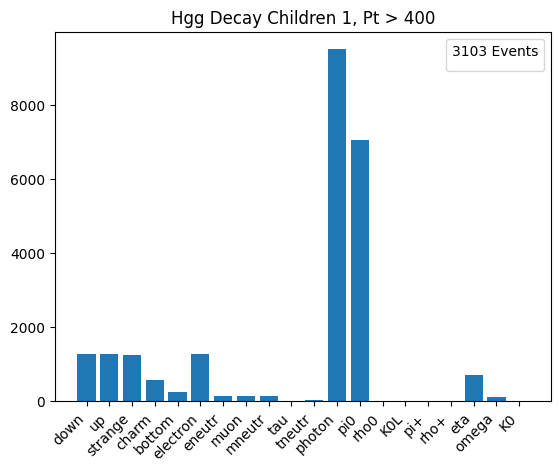

In [541]:
plt.bar(hgparticles[:20], hga[1][:20])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hgg Decay Children 1, Pt > {ptcut}')
plt.legend(title=f"{hgcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


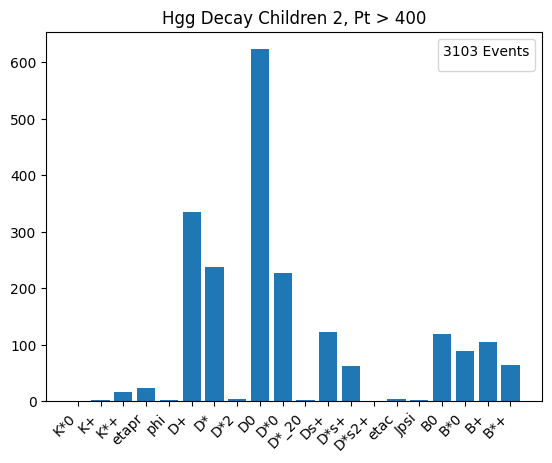

In [542]:
plt.bar(hgparticles[20:40], hga[1][20:40])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hgg Decay Children 2, Pt > {ptcut}')
plt.legend(title=f"{hgcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


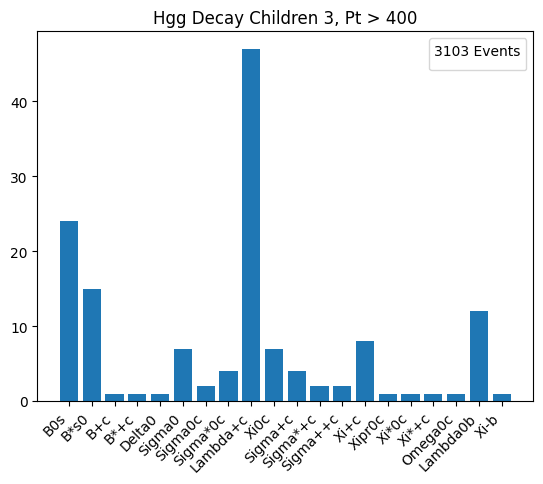

In [543]:
plt.bar(hgparticles[40:60], hga[1][40:60])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hgg Decay Children 3, Pt > {ptcut}')
plt.legend(title=f"{hgcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


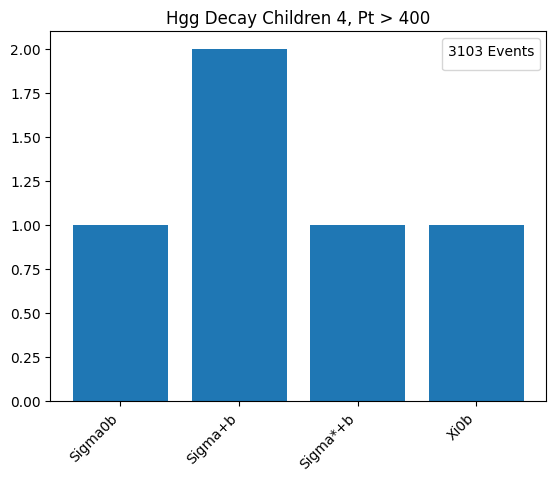

In [544]:
plt.bar(hgparticles[60:], hga[1][60:])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hgg Decay Children 4, Pt > {ptcut}')
plt.legend(title=f"{hgcount} Events")
plt.show()

In [577]:
hbp = hbb.GenPart
hbp = hbp[(hbp.pt > ptcut)]
index = (hbp.pdgId == 25) & (hbp.hasFlags(['isLastCopy', 'fromHardProcess'])) #filter for Higgs
assert ak.all(ak.num(hbp[index],axis=1)==1) #guarantee only one higgs
hbhiggses = ak.flatten(hbp[index], axis=1)
assert ak.all(abs(hbhiggses.children.pdgId) == 5) #guarantee all higgs decay to desired product

In [ ]:
hbc1 = hbhiggses.children.compute()
hbc2 = hbhiggses.children.children.compute()
hbc3 = hbhiggses.children.children.children.compute()
hbc4 = hbhiggses.children.children.children.children.compute()
hbc5 = hbhiggses.children.children.children.children.children.compute()
hbc6 = hbhiggses.children.children.children.children.children.children.compute()
hbc7 = hbhiggses.children.children.children.children.children.children.children.compute()
hbc8 = hbhiggses.children.children.children.children.children.children.children.children.compute()
hbc9 = hbhiggses.children.children.children.children.children.children.children.children.children.compute()

In [547]:
hbc2 = ak.flatten(hbc2, axis=2)
hbc3 = ak.flatten(ak.flatten(hbc3, axis=2), axis=2)
hbc4 = ak.flatten(ak.flatten(ak.flatten(hbc4, axis=2), axis=2), axis=2)
hbc5 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(hbc5, axis=2), axis=2), axis=2), axis=2)
hbc6 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hbc6, axis=2), axis=2), axis=2), axis=2), axis=2)
hbc7 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hbc7, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
hbc8 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hbc8, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
hbc9 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(hbc9, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)

In [548]:
many_children = ak.concatenate([hbc1, hbc2, hbc3, hbc4, hbc5, hbc6, hbc7, hbc8, hbc9], axis=1)

In [549]:
cut = many_children.hasFlags(['isLastCopy', 'isLastCopyBeforeFSR'])
cut2 = many_children.hasFlags(['isLastCopy'])

In [550]:
many_children = many_children[cut2]
hba = np.unique(ak.flatten(abs(many_children.pdgId[abs(many_children.pdgId) != 5])), return_counts=True)
#a = np.unique(ak.flatten(abs(many_children.pdgId)), return_counts=True)

In [551]:
hbparticles = []
for i in hba[0]:
    hbparticles.append(pdgid_table[str(i)])
hbcount = ak.count(hbhiggses.pt).compute()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


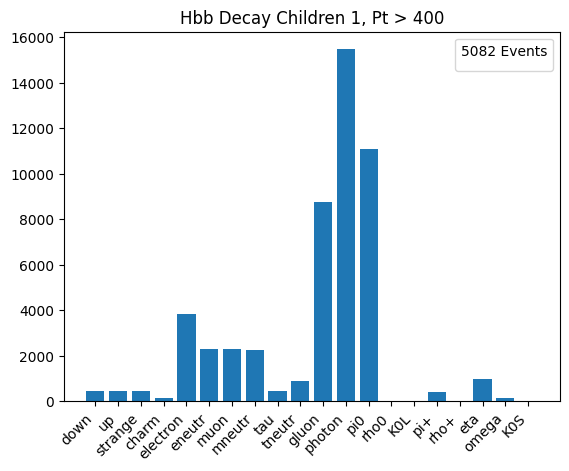

In [552]:
plt.bar(hbparticles[:20], hba[1][:20])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hbb Decay Children 1, Pt > {ptcut}')
plt.legend(title=f"{hbcount} Events*")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


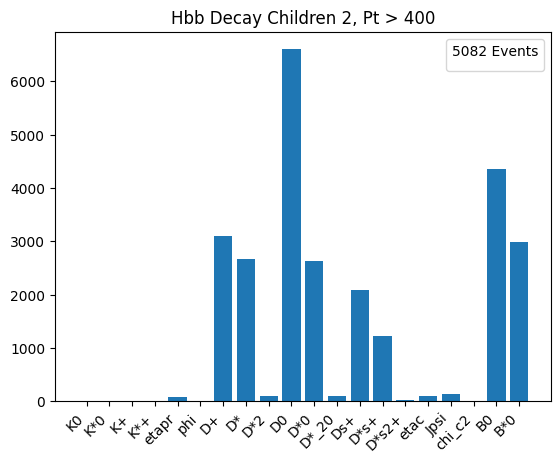

In [553]:
plt.bar(hbparticles[20:40], hba[1][20:40])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hbb Decay Children 2, Pt > {ptcut}')
plt.legend(title=f"{hbcount} Events*")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


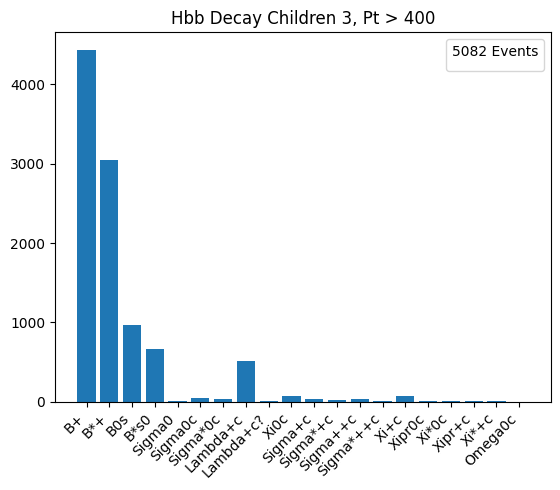

In [554]:
plt.bar(hbparticles[40:60], hba[1][40:60])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hbb Decay Children 3, Pt > {ptcut}')
plt.legend(title=f"{hbcount} Events*")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


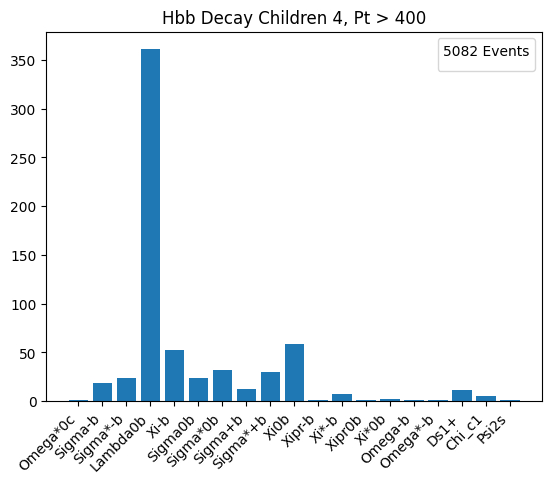

In [555]:
plt.bar(hbparticles[60:], hba[1][60:])
plt.xticks(rotation=45, ha="right")
plt.title(f'Hbb Decay Children 4, Pt > {ptcut}')
plt.legend(title=f"{hbcount} Events*")
plt.show()

In [556]:
qgp = qcd.GenPart[qcd.GenPart.pt > ptcut]

In [557]:
qc1 = qgp.children.compute()
qc2 = qgp.children.children.compute()
qc3 = qgp.children.children.children.compute()
qc4 = qgp.children.children.children.children.compute()
qc5 = qgp.children.children.children.children.children.compute()
qc6 = qgp.children.children.children.children.children.children.compute()
qc7 = qgp.children.children.children.children.children.children.children.compute()
qc8 = qgp.children.children.children.children.children.children.children.children.compute()
qc9 = qgp.children.children.children.children.children.children.children.children.children.compute()
qc10 = qgp.children.children.children.children.children.children.children.children.children.children.compute()
qc11 = qgp.children.children.children.children.children.children.children.children.children.children.children.compute()

In [558]:
qc2 = ak.flatten(qc2, axis=2)
qc3 = ak.flatten(ak.flatten(qc3, axis=2), axis=2)
qc4 = ak.flatten(ak.flatten(ak.flatten(qc4, axis=2), axis=2), axis=2)
qc5 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc5, axis=2), axis=2), axis=2), axis=2)
qc6 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc6, axis=2), axis=2), axis=2), axis=2), axis=2)
qc7 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc7, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
qc8 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc8, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
qc9 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc9, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
qc10 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc10, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
qc11 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(qc11, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)

In [559]:
many_children = ak.flatten(ak.concatenate([qc1, qc2, qc3, qc4, qc5, qc6, qc7, qc8, qc9, qc10, qc11], axis=1))

In [560]:
cut = many_children.hasFlags(['isLastCopy', 'isLastCopyBeforeFSR'])
cut2 = many_children.hasFlags(['isLastCopy'])

In [561]:
many_children = many_children[cut2]
qa = np.unique(ak.flatten(abs(many_children.pdgId)), return_counts=True)
#a = np.unique(ak.flatten(abs(many_children.pdgId)), return_counts=True)

In [562]:
qcdparticles = []
for i in qa[0]:
    qcdparticles.append(pdgid_table[str(i)])
qcdcount = len(ak.where(ak.count(qgp.pt, axis=1).compute() != 0)[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


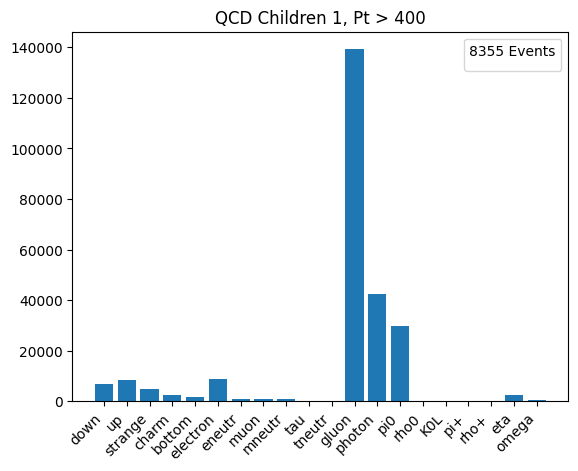

In [563]:
plt.bar(qcdparticles[:20], qa[1][:20])
plt.xticks(rotation=45, ha="right")
plt.title(f'QCD Children 1, Pt > {ptcut}')
plt.legend(title=f"{qcdcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


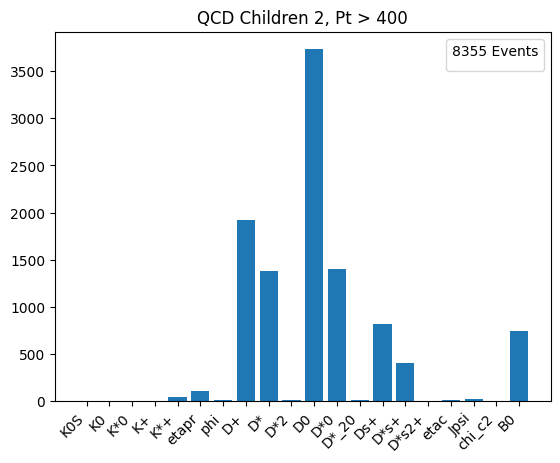

In [564]:
plt.bar(qcdparticles[20:40], qa[1][20:40])
plt.xticks(rotation=45, ha="right")
plt.title(f'QCD Children 2, Pt > {ptcut}')
plt.legend(title=f"{qcdcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


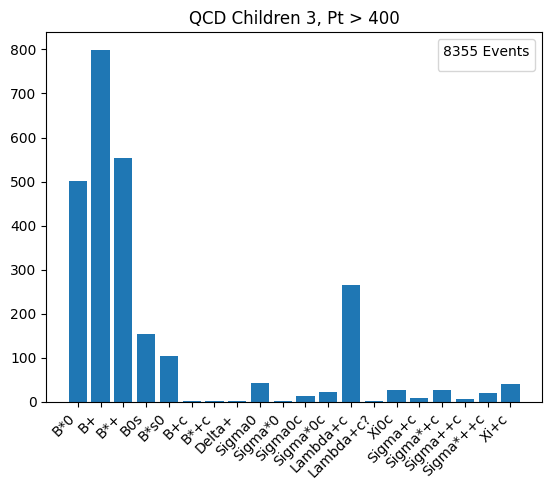

In [565]:
plt.bar(qcdparticles[40:60], qa[1][40:60])
plt.xticks(rotation=45, ha="right")
plt.title(f'QCD Children 3, Pt > {ptcut}')
plt.legend(title=f"{qcdcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


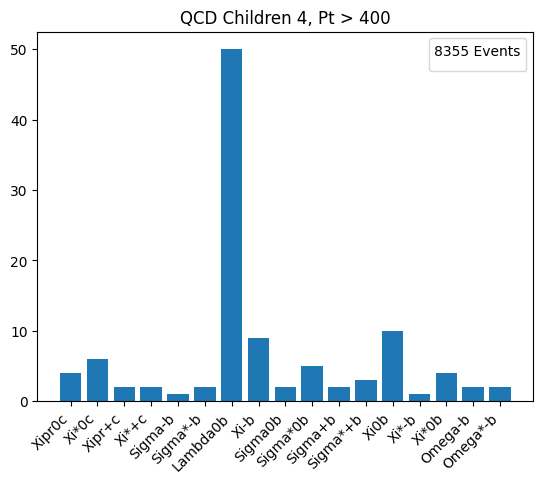

In [566]:
plt.bar(qcdparticles[60:80], qa[1][60:80])
plt.xticks(rotation=45, ha="right")
plt.title(f'QCD Children 4, Pt > {ptcut}')
plt.legend(title=f"{qcdcount} Events")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


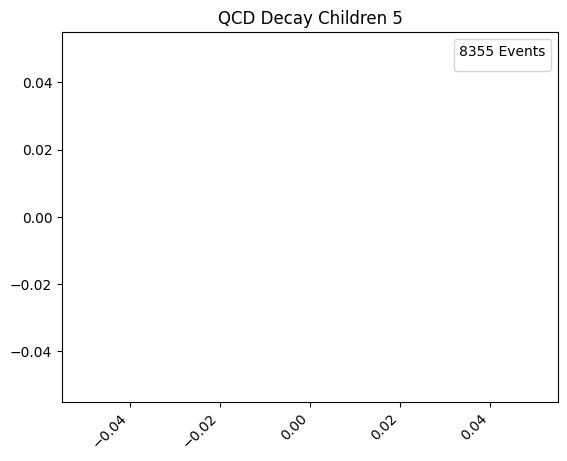

In [567]:
plt.bar(qcdparticles[80:], qa[1][80:])
plt.xticks(rotation=45, ha="right")
plt.title('QCD Decay Children 5')
plt.legend(title=f"{qcdcount} Events")
plt.show()

In [ ]:
p = hghiggses.children.children.children.children.children.children.children.children.children.children.children.compute()
ak.flatten(p, axis=None)

In [512]:
ak.max(qgp.pt.compute())

748.0

In [568]:
ak.max(hghiggses.pt.compute())

1124.0

In [569]:
ak.max(hbhiggses.pt.compute())

1356.0